# Assignment 4
## Kunal Naidu
## 30020999


# Introduction

In this report will attempt to create a 2d Ising Model. First we will attempt a 1D ising model and then move to 2D.
For this assignment towards the end of the assignment my code stopped working and with the time constaint i wasn't able to debug it. From that point I used the code given to attempt continue the work but ran out of time. The following will include an explaination for what i did and what i would've done if the code had worked.

The engery reguired to align a magnetic dipole in a magnetic field is given by 

$$U = - \vec m \cdot \vec B = - m B \cos\theta $$

Where $U$ is the energy, $m$ is the magnetic dipole, $B$ is the magnetic field, and $\theta$ is the angle between the dipole moment and field direction.

When the angle between the magnetic field and the dipole is paralell. The potential enegery would be a minimum at 

  $$ U = - m B $$
  
When the angle between the magnetic field and the dipole is opposite from eachother. The potential energy would be a maximum at

  $$ U = + m B $$
  


The probability of the states of a small system in thermal equilibrium with a "heat sink" follows the Boltzman distribution.

$$ p(\mathbf x) \propto \exp \left(-\frac{E(\mathbf x)}{k T}\right) $$

Where E is the energy, T is the temperture of the "heat sink", and x is the state. X can be considered a state or a vector of states.

If we consider two arbitrary states with Energies $E_1$ and $E_2$

  $$ p_1 \propto \exp \left(-\frac{E_1}{k T}\right) $$

  $$ p_2 \propto \exp \left(-\frac{E_2}{k T}\right) $$
  
These probabilities aren't nomalized. So they don't add to 1. This makes sense because the probabilities are defined as relations. So they're missing a constant to make them equal to one. This constant can be found.

$$ C\, \exp \left(-\frac{E_1}{k T}\right) + C\, \exp \left(-\frac{E_2}{k T}\right) = 1 $$

Where C is a constant. $C$ can be solved to get

$$ C = \frac{1}{e^{\left( -\frac{E_1}{k T} \right)}
+ e^{\left( -\frac{E_2}{k T} \right)}} $$

But for more simplicity the inverse can be used and called $Z$

$$ Z = e^{\left( -\frac{E_1}{k T} \right)}
+ e^{\left( -\frac{E_2}{k T} \right)} $$

$\beta$ can also be defined to further simply

$$ \beta = \frac{1}{k_B T}  $$

Now looking back at the probability equation with the new constant,

$$ p_k = \frac{e^{-\beta E_k}}{Z} $$


The relative probability can be also calculated which doesn't need us to care about the constant $C$.

$$ r = \frac{p_f}{p_i} \propto e^{(E_2-E_1)/kT} $$

Lets define $E_+$ and $E_-$ to be the engery of spin up and spin down respectively. Since we know that the energies are of equal magnitude of opposite direction. The change in energy would be 

$$ \Delta E = E_+ - E_- = 2E $$

We can also calculate the probability for spin up and spin down.

 $$ p_+ = \frac{1}{1 + \exp(-\beta \Delta E )} $$
 
 $$ p_- = \frac{1}{1 + \exp(+\beta \Delta E )} $$
 
For a group of dipoles wtih states +1 and -1 in a external magnetic field the engery is

$$ E = -B \sum_k S_k $$

We have 4 different possiblilites for two different states. 

      S1  S2   Energy  Probability (un-normalized)
     +1  +1   -2B      exp(+beta 2B)
     +1  -1    0B      1
     -1  +1    0B      1
     -1  -1    2B      exp(-beta 2B)
     
Although there is only 3 different energy configurations.

Using these 3 different engery configurations, we can calculate the individual probabilities for these states to be.

 $$ p_i = \frac{e^{-E/K_BT}}{Z} $$
 
where,

$$ Z = \exp(-2B \beta) + 2 \exp(0) + \exp(+2B \beta) $$

For an arbitrary number of N dipoles the partition function is defined as

$$Z=\sum_i^N e^{-\beta*E_i}$$

In [1]:
from itertools import permutations
import numpy as np
import scipy.constants
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import matplotlib.animation

In [2]:
def combinations(N):
    """
    Determines all possible combinations of values of +1 and -1 for 1 dimentional N-sized array
    
    Parameters
    ----------
    
    N: number of values in array
    
    Returns
    -------
    
    unique_outcomes: list of all the possible combinations of values for the N-sized array
    
    """
    outcomes=[]
    all_negative=np.full(N,-1)
    outcomes=outcomes+list(permutations(all_negative))
    for i in range(N):
        all_negative[i]=1
        outcomes=outcomes+list(permutations(all_negative))
    unique_outcomes=list(set(outcomes))
    return unique_outcomes

In [3]:
def energy_state(unique_combinations,B):
    """
    Determines Energy State for an arbritary list of dipoles
    
    Parameters
    ----------
    
    unique_combinations: list of arbitrary lists of dipoles
    
    B: External Magnetic Field
    
    Returns
    -------
    
    energy: list of the energies for the arbitrairy list of dipoles
    
    """
    energy=[]
    for i in unique_combinations:
        s=sum(i)
        energy.append(-B*s)
    return energy
    

In [4]:
def probability(N,B,beta):
    """
    Determines the probability for an configurations of dipoles
    
    Parameters
    ----------
    
    N: Number of independent dipoles
    
    B: External Magnetic Field
    
    beta: relationship between 1/(k_B*T)
    
    Returns
    -------
    
    p_i: list of the probabilities of different configurations
    
    e: list of the energy of different configurations
    
    c: list of all the possible combinations of values for the N-sized array
    
    """
    p_i=[]
    c=combinations(N)
    e=energy_state(c,B)
    z=0
    for i in e:
        z+=np.exp(-beta*i)
    for i in e:
        #p_numerator=np.exp(-i*beta*scipy.constants.Boltzmann)
        p_numerator=np.exp(-i*beta)
        p_i.append(p_numerator/z)
    return p_i,e,c

In [5]:
a=probability(3,2,0.1)
pd.DataFrame({'States':a[2],'Energy':a[1],'Probability':a[0]})

,States,Energy,Probability
0,"(1, 1, -1)",-2,0.143841
1,"(-1, 1, 1)",-2,0.143841
2,"(1, -1, -1)",2,0.096420
3,"(-1, -1, 1)",2,0.096420
4,"(-1, -1, -1)",6,0.064632
5,"(-1, 1, -1)",2,0.096420
6,"(1, -1, 1)",-2,0.143841
7,"(1, 1, 1)",-6,0.214586


In [6]:
def random_state(N,B=2,beta=0.1):
    """
    Randomly chooses a state with the probabilities of Boltzmann distribution.
    
    Parameters
    ----------
    
    N: Number of independent dipoles
    
    B: External Magnetic Field
    
    beta: relationship between 1/(k_B*T)
    
    Returns
    --------
    
    state_actual= random state
    
    """
    data=probability(N,B,beta)
    state_number = np.random.choice(range(len(data[2])), p=data[0])
    state_actual=data[2][state_number]
    return state_actual

In [7]:
random_state(3)

(-1, 1, 1)

In [8]:
n=1000
time_N=[]
N_range=range(2,8)
for i in N_range:
    function='random_state('+str(i)+')'
    function = 'random_state({:d})'.format(i)
    t=timeit.timeit(function,setup='from __main__ import random_state', number=n)
    time_N.append(t)


Text(0,0.5,'Probability')

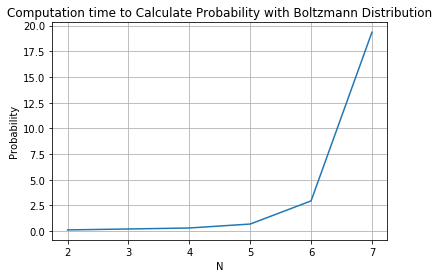

In [9]:
plt.plot(N_range,time_N)

plt.grid('on')
plt.title('Computation time to Calculate Probability with Boltzmann Distribution')
plt.xlabel('N')
plt.ylabel('Probability')


When measuring the time to calculate the probability we can see that as the number of independent dipoles increase exponentially. This is expected because our figuring out the probabilities for the different combinations is a very extensive task. Next we will look at the metropolis algorithim.

If we look at the Metropolis Algorithim, we can find a different approach to this problem. With this approach we will look at an initial energy $E_0$ and will be changing it to $E_1$ and be calculating probability that it will stay in this state. We will be looking at the following equation/code:


$$p=min(1,e^{-\frac{\Delta E}{T}})$$

where $$ \Delta E=E_1−E_0$$

If at a higher energy state then there will always be a flip to a lower energy state. If at a lower energy state there is a probability that it might flip into a higher energy state. The transition from lower energy state to higher energy state is more probable at higher tempertures.


In [10]:
def metropolis(dE,T):
    """
    Function that using the Metropolis Algorithim to calculate probability
    
    Parameters
    ----------
    
    dE: Change in Energy
    
    T: Temperture
    
    Returns
    -------
    
    p: Probability
    """
    p=min(1,np.exp(-dE/T))
    return p

In [11]:
def random_state_m(dE,T,itterations):
    """
    Creates states with the probability calculated from the metropolis function with 1000 itterations.
    
    Parameters
    ----------
    
    dE: Change in Energy
    
    T: Temperture
    
    Returns
    -------
    
    state: list of the outcomes
    
    """
    state=[]
    Probability_M_plus1=metropolis(dE,T)
    Probability_M_minus1=1-Probability_M_plus1
    for values in range(itterations):
        state_number = np.random.choice([1,-1], p=[Probability_M_plus1,Probability_M_minus1])
        state.append(state_number)
    return state

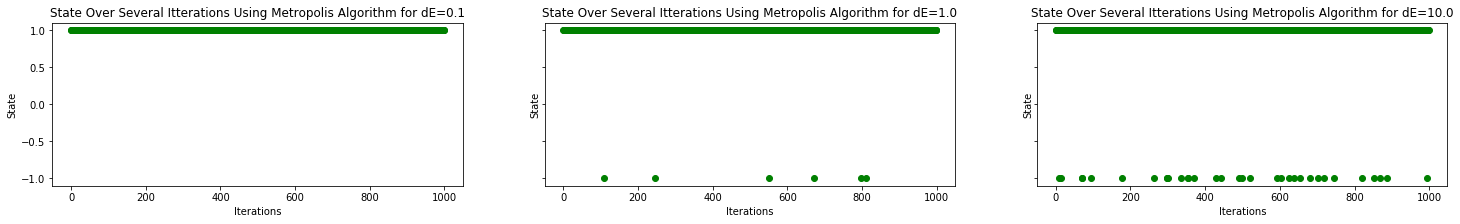

In [12]:
dE=[0.1,1.0,10.0]
T=300
Iterations=1000
data={}
position=[131,132,133]
for values in dE:
    data[values]=random_state_m(values,T,Iterations)


fig,axes=plt.subplots(1,3,figsize=(25,3), sharey=True)
for i,j,k,ax in zip(data.keys(),dE,position,axes,):
    ax.plot(range(Iterations),data[i],"go",label=str(j))
    ax.set_xlabel('Iterations')
    ax.set_ylabel('State')
    ax.set_title("State Over Several Itterations Using Metropolis Algorithm for dE="+str(j))



for system with N=1
$$
\begin{align}
dE = E_1-E_0 &> 0\\
(-BS_1)-(-BS_0) &> 0 \\
-B(S_1-S_0) &> 0 \\
(S_1-S_0) &< 0 \\
S_1 &< S_0 \\
\end{align}
$$

So that means that if dE is bigger than zero and the Magnetic Field is Positive. This results in $S_1$ being -1 and $S_0$ being +1.Also means we start with a +1 dipole. This lets us determine which probabilities coorespond for which probability.

To find the B field 
\begin{align}
dE &= -B(S_1-S_0) \\
B &= -\frac{dE}{(S_1-S_0)} \\
\end{align}

$$\beta=\frac{1}{K_B T}$$
$$T=\frac{1}{K_B \beta}$$



In [13]:
dE=-2*(-2)
T=1/(0.1*scipy.constants.Stefan_Boltzmann)

metropolis(dE,T)


0.9999999773185323

In [14]:
probability(1,2,0.1)

([0.40131233988754794, 0.598687660112452], [2, -2], [(-1,), (1,)])

When trying to compare the values between our first  and second method. We needed to make sure that they both have the same temperture and magnetic field. When actually calculating these probabilities. We should've expected them to be the same but they weren't.

In [15]:
dE=[0.1,1.0,10.0]
T=300
for E in dE:
    print(metropolis(E,T))


0.9996667222160499
0.9966722160545233
0.9672161004820059


To find the probabilities to compare to our metropolis function we can use relative probabilities. This helps us to ignore trying to calculate the magnetic field

If we take the relative probability using our first method it would be

\begin{align}
r &= \frac{p_1}{p_0} \\
r &=\frac{e^{-\beta E_1}}{z}\frac{z}{e^{-\beta E_0}} \\
r &= e^{-\beta E_1+\beta E_0}
\end{align}

We also know

\begin{align}
r = \frac{p_1}{p_0} \\
p_0+p_1 =1 \\
\end{align}

So with those two relations we can get
$$p_1=\frac{r}{1+r}$$



In [16]:
beta=1/(scipy.constants.Stefan_Boltzmann*T)
print(scipy.constants.Stefan_Boltzmann)
for values in dE:
    relative_probability=np.exp(values)
    print(relative_probability)

5.670367e-08
1.1051709180756477
2.718281828459045
22026.465794806718


This second method was used which resulted in overflow error when actually trying to calculate the individual probabilities for the dipoles.

Now instead we will look at where the Energy of a individual dipole is influenced by it's surroundings.

Each dipole will generate a (small) magnetic field that may influence other dipoles.  We can explore this possibility by arranging a number of binary spins $S_k$ in a row (or a ring) and then introduce a weak coupling term

 $$ E_i = -J \,S_{i-1} S_i - J \,S_{i+1} S_k
  = -J \sum_j S_i S_j  \qquad j=i+1, i-1
 $$
that can only affect the nearest neighbors.

In [81]:
#beta=1/(np.constants.Stephan_Boltzmann*T)
 #   state_i=random_state(N,B,beta)
def Neighbor_Energy_1D(J,state,position):
    """
    Calculates the Energy of Dipole by looking at it's Neighbors
    
    Parameters
    ----------
    
    J: Constant
    
    state: initail grid
    
    position: position of dipole 
    
    Returns
    -------
    
    E_i= Energy of dipole
    
    """
    current_state=state[position]
    try:
        s_i=state[position-1]*current_state
    except IndexError:
        s_i=state[-1]*current_state
    try:
        s_j=state[position+1]*current_state
    except IndexError:
        s_j=state[1]*current_state
    s = s_i+s_j
    E_i=-J*s
    return E_i


def stepper(state_i,T,J):
    """
    Steps the State for a 1D ising model
    
    Parameters
    ----------
    
    state_i=intial state
    
    T: Temperture
    J: Constant
    
    Returns
    -------
    
    state_f: final state after step
    
    """
    state_f=[]
    for i in range(len(state_i)):
        e_0=Neighbor_Energy_1D(J,state_i,i)
        state_change=state_i.copy()
        if state_change[i] == +1:
            state_change[i]=-1
        elif state_change[i] == -1:
            state_change[i]=+1
        else:
            print("error")
        e_1=Neighbor_Energy_1D(J,state_change,i)
        dE=e_1-e_0
        Probability_stay=metropolis(dE,T)
        Probability_change=1-Probability_stay
        state_number = np.random.choice([state_i[i],state_change[i]], p=[Probability_stay,Probability_change])
        print(Probability_stay)
        state_f.append(state_number)
    return state_f
        
        
        


In [92]:
image=[]
for i in range(30):
    image.append(stepper([-1,-1,-1,1,1,1,-1,1,-1,1,-1,1,1],100,0.1))

1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439915
1
1
1
1
1
1
1
1
1
0.9960079893439915
1
1
0.9960079893439

Text(0,0.5,'Itterations')

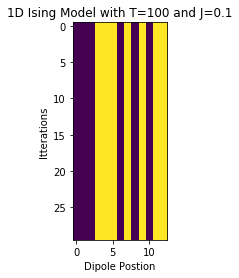

In [95]:
plt.imshow(image)
plt.title('1D Ising Model with T=100 and J=0.1')
plt.xlabel('Dipole Postion')
plt.ylabel('Itterations')



Looking at the plot above, theres no change in the state. This isn't expected. This could be from misinterpreting the formula. Probabily the formula for Energy.

Now we will look at the 2D case for the ising model.

Consider a lattice of N sites, each containing a spin $S_n$ where $n=1,\ldots,N$.  Each spin can be either "up" ($S_n = +1$) or down ($S_n=-1$).  Each spin interacts magnetically with its nearest four neighbors (above, below, left, right) and with an external magnetic field (if present).  The Hamiltonian for this Ising model is

$$ E(S_1,\ldots,S_N) = -J \sum_{i,j} S_i S_j - B \sum_k S_k $$

where the interaction sum $i,j$ is over the four nearest-neighbour pairs of spins ie. $S_{ij}$ interacts with $S_{i\pm 1,j}$ and $S_{i,j \pm 1}$ and the diagonal neighbors are ignored.


In [96]:
def Neighbor_Energy_2D(J,state,position_x,position_y):
    """
    Energy of Dipole by looking at it's verticle and horizontal neighbors
    
    Parameters
    ----------
    
    J: constant
    
    state: intial state
    
    position_x: x axis postion of dipole 
    
    position_y: y axis postion of dipole 
    
    Returns
    -------
    
    s_total: Energy of dipole
    
    """
    current_state=state[position_y][position_x]
    try:
        s_i_verticle=state[position_y-1][position_x]*current_state
    except IndexError:
        s_i_verticle=state[-1][position_x]*current_state
    try:
        s_j_verticle=state[position_y+1][position_x]*current_state
    except IndexError:
        s_j_verticle=state[1][position_x]*current_state
    s_verticle=s_i_verticle+s_j_verticle
        
    try:
        s_i_horizontal=state[position_y][position_x-1]*current_state
    except IndexError:
        s_i_horizontal=state[position_y][-1]*current_state
    try:
        s_j_horizontal=state[position_y][position_x+1]*current_state
    except IndexError:
        s_j_horizontal=state[position_y][1]*current_state
    s_horizontal=s_i_horizontal+s_j_horizontal
    s_total=-J*(s_verticle+s_horizontal)
    return s_total


def Ising_Energy(J,state,position_x,position_y,B):
    """
    Energy of Dipole by looking at it's verticle and horizontal neighbors and Magnetic Field
    
    Parameters
    ----------
    
    J: constant
    
    state: intial state
    
    position_x: x axis postion of dipole 
    
    position_y: y axis postion of dipole 
    
    B: Magnetic Field
    
    Returns
    -------
    
    E: Energy of dipole
    
    """
    E=Neighbor_Energy_2D(J,state,position_x,position_y)+(-B*state[position_y][position_x])
    return E


def Ising_stepper(state_i,J,B):
    """
    Steps the 2D Ising model
    
    Parameters
    ----------
    
    J: constant
    
    state_i: intial state
    
    B: magnetic field
    
    
    Returns
    -------
    
    state_f: state after step
    
    """
    state_f=state_i.copy()
    for i in range(len(state_i)):
        for j in range(len(state_i[i])):
            E_0=Ising_Energy(J,state_i,j,i,B)
            state_change=state_i.copy()
            if state_change[i][j] == +1:
                state_change[i][j]=-1
            elif state_change[i][j] == -1:
                state_change[i][j]=+1
            else:
                print("error")
            E_1=Ising_Energy(J,state_change,j,i,B)
            dE=E_1-E_0
            Probability_change=metropolis(dE,T)
            Probability_stay=1-Probability_change
            state_number=np.random.choice([state_i[i][j],state_change[i][j]],p=[Probability_stay,Probability_change])
            state_f[i][j]=state_number
    return state_f
        

In [21]:
def random_grid(N,M):
    """
    creates random grid of +1 and -1
    
    Parameters
    ----------
    N: Horizontal Size
    M: Verticle Size
  
    Returns
    -------
    
    grid: random grid
    
    """
    grid=np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            grid[i][j]=np.random.choice([-1,1],p=(0.5,0.5))
    return grid

In [22]:
grid_ising=random_grid(51,49)
Ising_stepper(grid_ising,200,300)

array([[-1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1., -1., -1.],
       ...,
       [ 1., -1., -1., ...,  1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.]])

In [23]:

def Itteration_Stepper(Itterations,J,B):
    """
    Uses the Ising Stepper for a certain number of interations
    
    Parameters
    ----------
    
    J: constant
    
    B: magnetic field
    
    Itterations: number of itterations
     
    
    Returns
    -------
    
    grid_ising: the grid after stepping 
    
    """
    grid_ising=random_grid(51,49)
    for i in range(Itterations):
        grid_ising=Ising_stepper(grid_ising,J,B)
    return grid_ising

Text(0,0.5,'Dipole Position')

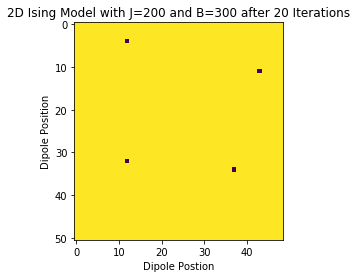

In [103]:
plt.imshow(Itteration_Stepper(20,200,300))
plt.title('2D Ising Model with J=200 and B=300 after 20 Iterations')
plt.xlabel('Dipole Postion')
plt.ylabel('Dipole Position')

Text(0,0.5,'Dipole Position')

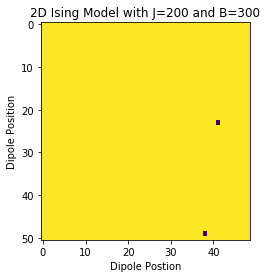

In [100]:
plt.imshow(Itteration_Stepper(100,200,300))
plt.title('2D Ising Model with J=200 and B=300 after 100 Iterations')
plt.xlabel('Dipole Postion')
plt.ylabel('Dipole Position')

Text(0,0.5,'Dipole Position')

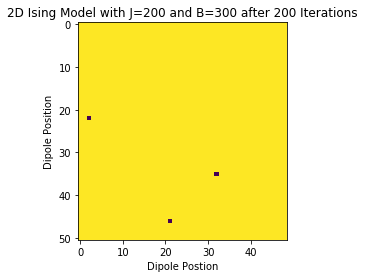

In [102]:
plt.imshow(Itteration_Stepper(200,200,300))
plt.title('2D Ising Model with J=200 and B=300 after 200 Iterations')
plt.xlabel('Dipole Postion')
plt.ylabel('Dipole Position')

Looking at these plots this isn't what is expected. For some reason my code stopped working. Previously I had graphs that were randomly distributed with dipoles. This is the point where i switched to the given code.

In [63]:
def formula_J(T):
    """
    Calculates J
    
    Parameters
    ----------
    
    T: temperture
    
    Returns
    -------
    
    J: constant
    
    """
    J=scipy.constants.Stefan_Boltzmann*T
    return J

In [35]:
def spinflip(nearspins, J, B, T):
    """
    determines if dipole is up or down.
    
    Parameters
    ---------
    
    nearspins: count of spins neighboring the dipole
    
    J:constant
    
    B: magnetic field
    
    T: temperture
    
    Returns:
    --------
    
    2*spin_up-1: dipole change
    """
    nspins = len(nearspins)   #; print(nspins)
    local_field = J*nearspins + B
    
    probability_plus = 1.0 / (1.0 + np.exp(-2*local_field/T) )
    spin_up = probability_plus > np.random.rand(nspins)
    
    return 2*spin_up - 1
    #-------------------------------------------------------


def isingstep(grid, nsites=1, J=1.0, B=0.0, T=0.5):
    """ Pick one or more sites at random, count the neighbours, 
    and apply flips.
    
    Parameters:
    
    grid: intial grid
    
    nsites:
    
    J:constant
    
    B:magnetic field
    
    T:temperture
    
    Returns
    -------
    grid.copy: copy of step of grid
    """
    nx, ny = grid.shape

    # pick some random grid location(s)
    xx = (np.random.rand(nsites)*nx).astype(np.int)
    yy = (np.random.rand(nsites)*ny).astype(np.int) 

    # count neighboring spins, taking care to wrap as needed
    nn = grid[xx,(yy+1)%ny] + grid[xx,yy-1] + grid[(xx+1)%nx,yy] + grid[xx-1,yy]
    grid[xx,yy] = spinflip(nn, J, B, T)    
    
    return grid.copy()
    #----------------------------------------------------


def ising_model(grid, J, B, T, nsteps=1, plot=True):    
    """
    Simulates the Ising model
    
    Parameters
    ---------
    
    grid:intital grid
    
    J: constant
    
    B: magentic field
    
    T: temperture
    
    nsteps: number of steps
    
    plot: whether to plot graph
    
    returns
    -------
    
    grid: grid after step
    
    M: magnetizatoin values
    """
    nx, ny = grid.shape
    nsites = int( 0.05 * grid.size )

    if plot:
        fig = plt.gcf()
        ims = plt.imshow(grid)

    M = []  # magnetization        
    for indx in range(nsteps): 
        M.append( np.sum(grid)/np.size(grid) ) 
        
        # successive grids may be corelated, so skip a few
        for nsteps in range(9):
            grid = isingstep(grid, nsites=nsites, J=J, B=B, T=T)    
            
        if plot:
            ims.set_data(grid) #; print(np.sum(grid)/grid.size)
            fig.canvas.draw() ; fig.canvas.flush_events()

    return grid, M

###### Produce plots for J=(kB T), B=0, B=+0.5, B=-0.5

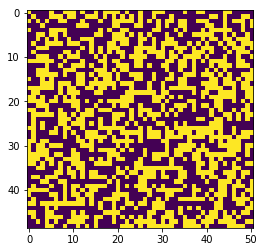

In [99]:
T=300
B=0
plt.imshow(ising_model(random_grid(49,51),formula_J(T),B,T,nsteps=100,plot=False)[0])
plt.title('2D Ising Model with  B=0 after 100 Iterations')
plt.xlabel('Dipole Postion')
plt.ylabel('Dipole Position')

Text(0,0.5,'Dipole Position')

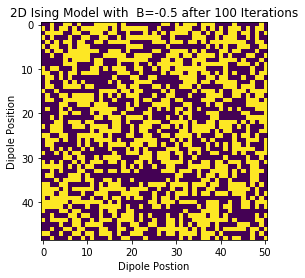

In [105]:
B=-0.5
T=300
plt.imshow(ising_model(random_grid(49,51),formula_J(T),B,T,nsteps=100,plot=False)[0])
plt.title('2D Ising Model with  B=-0.5 after 100 Iterations')
plt.xlabel('Dipole Postion')
plt.ylabel('Dipole Position')

Text(0,0.5,'Dipole Position')

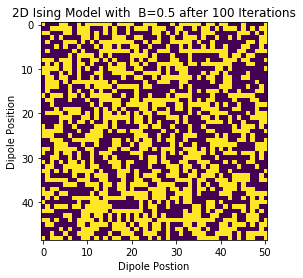

In [106]:
T=300
B=0.5
plt.imshow(ising_model(random_grid(49,51),formula_J(T),B,T,nsteps=100,plot=False)[0])
plt.title('2D Ising Model with  B=0.5 after 100 Iterations')
plt.xlabel('Dipole Postion')
plt.ylabel('Dipole Position')

##### For B=0 and J/(T kB)=range(0.0, 0.6, 21), calculate and plot the average magnetization M versus J/TkB.

For this question I was gonna take J/(T K) and calculate J=TK(range(0.0,0.6,21) with T being some constant like T=300
then use that to calculate ising_model function and only use the last magnatization. Also i would do it for 100 itterations where the ising model can stabalize. Finally graphing M vs J/TK. Just by looking at the equation i would expect something linear. 

0.0
0.03
0.06
0.09
0.12
0.15
0.18
0.21
0.24
0.27
0.3
0.32999999999999996
0.36
0.39
0.42
0.44999999999999996
0.48
0.51
0.54
0.57
0.6


(array([[-1., -1., -1., ..., -1., -1., -1.],
        [ 1.,  1., -1., ...,  1., -1.,  1.],
        [-1.,  1., -1., ..., -1., -1., -1.],
        ...,
        [ 1., -1., -1., ...,  1.,  1., -1.],
        [-1., -1.,  1., ..., -1.,  1.,  1.],
        [ 1., -1.,  1., ...,  1., -1., -1.]]),
 [0.009203681472589036,
  -0.004401760704281713,
  -0.0012004801920768306,
  0.027611044417767107,
  0.012404961984793917,
  -0.010804321728691477,
  0.005202080832332933,
  -0.026010404161664665,
  -0.006002400960384154,
  0.004401760704281713,
  0.024409763905562223,
  0.00040016006402561027,
  0.008403361344537815,
  -0.006002400960384154,
  -0.0196078431372549,
  0.0012004801920768306,
  0.0196078431372549,
  -0.006802721088435374,
  -0.025210084033613446,
  -0.03721488595438175,
  -0.03961584633853541,
  -0.05562224889955982,
  -0.04601840736294518,
  -0.0196078431372549,
  -0.036414565826330535,
  -0.013205282112845138,
  -0.0020008003201280513,
  -0.008403361344537815,
  0.00040016006402561027,
  0.

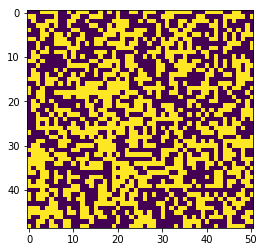

In [75]:
B=0
a=np.linspace(0.0,0.6,21)
for i in a:
ising_model(random_grid(49,51),formula_J(T),B,T,nsteps=100)

##### Produce a hysteresis curve over an appropriate range of external magnetic field B values.

Hysteresis curve is the flux density compared to the magnetization.

#### Produce a plot for J=-kB T.
Similar to above i would calculate J for different T.

# Conlcusion

In the report we looked at the 1D ising model. We built on more fundamental methods which are similar to equations to calculate Energies and Pobabilities and later using different methods to find faster ways to make calculations. Then we moved onto the 2D ising model. Again Due to Bugs in my code and time constraints i wasn't able to complete assignment. Attempts were made to get previous versions of file to find code without bug but previous versions of code had bug. I dont understand how it happened. It blew up on me out of nowhere.
